<a href="https://colab.research.google.com/github/Kuyas/TimeSeriesEntropy/blob/master/TimeSeries_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import time as time
import seaborn as sns
import pickle
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def save_obj(obj, name ):
    with open('/content/drive/My Drive/TimeSeries/save/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('/content/drive/My Drive/TimeSeries/save/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Import PRSA Data


In [4]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Aotizhongxin_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Aotizhongxin = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Aotizhongxin = Aotizhongxin.rename(columns = {0:"DateTime"}) # rename the concat'd column
Aotizhongxin = Aotizhongxin.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Aotizhongxin[cols_to_norm] = Aotizhongxin[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Aotizhongxin.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Aotizhongxin[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Changping_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Changping = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Changping = Changping.rename(columns = {0:"DateTime"}) # rename the concat'd column
Changping = Changping.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Changping[cols_to_norm] = Changping[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Changping.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Changping[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [6]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Dingling_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Dingling = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Dingling = Dingling.rename(columns = {0:"DateTime"}) # rename the concat'd column
Dingling = Dingling.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Dingling[cols_to_norm] = Dingling[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Dingling.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Dingling[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [7]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Dongsi_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Dongsi = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Dongsi = Dongsi.rename(columns = {0:"DateTime"}) # rename the concat'd column
Dongsi = Dongsi.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Dongsi[cols_to_norm] = Dongsi[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Dongsi.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Dongsi[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [8]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Guanyuan_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Guanyuan = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Guanyuan = Guanyuan.rename(columns = {0:"DateTime"}) # rename the concat'd column
Guanyuan = Guanyuan.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Guanyuan[cols_to_norm] = Guanyuan[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Guanyuan.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Guanyuan[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [9]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Gucheng_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Gucheng = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Gucheng = Gucheng.rename(columns = {0:"DateTime"}) # rename the concat'd column
Gucheng = Gucheng.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Gucheng[cols_to_norm] = Gucheng[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Gucheng.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Gucheng[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2013-03-01 01:00:00,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2013-03-01 02:00:00,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
2013-03-01 03:00:00,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
2013-03-01 04:00:00,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [10]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Huairou_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Huairou = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Huairou = Huairou.rename(columns = {0:"DateTime"}) # rename the concat'd column
Huairou = Huairou.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Huairou[cols_to_norm] = Huairou[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Huairou.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Huairou[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2013-03-01 02:00:00,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [11]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Nongzhanguan_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Nongzhanguan = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Nongzhanguan = Nongzhanguan.rename(columns = {0:"DateTime"}) # rename the concat'd column
Nongzhanguan = Nongzhanguan.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Nongzhanguan[cols_to_norm] = Nongzhanguan[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Nongzhanguan.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Nongzhanguan[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [12]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Shunyi_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Shunyi = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Shunyi = Shunyi.rename(columns = {0:"DateTime"}) # rename the concat'd column
Shunyi = Shunyi.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Shunyi[cols_to_norm] = Shunyi[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Shunyi.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Shunyi[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [13]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Tiantan_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Tiantan = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Tiantan = Tiantan.rename(columns = {0:"DateTime"}) # rename the concat'd column
Tiantan = Tiantan.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Tiantan[cols_to_norm] = Tiantan[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Tiantan.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Tiantan[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [14]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Wanliu_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Wanliu = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Wanliu = Wanliu.rename(columns = {0:"DateTime"}) # rename the concat'd column
Wanliu = Wanliu.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Wanliu[cols_to_norm] = Wanliu[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Wanliu.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Wanliu[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
2013-03-01 01:00:00,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
2013-03-01 03:00:00,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
2013-03-01 04:00:00,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [15]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Wanshouxigong_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Wanshouxigong = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Wanshouxigong = Wanshouxigong.rename(columns = {0:"DateTime"}) # rename the concat'd column
Wanshouxigong = Wanshouxigong.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Wanshouxigong[cols_to_norm] = Wanshouxigong[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Wanshouxigong.head())

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Wanshouxigong[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
2013-03-01 01:00:00,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2013-03-01 02:00:00,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
2013-03-01 03:00:00,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
2013-03-01 04:00:00,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


# Entropy Measures

In [0]:
def ApproxEntropy(U, m, r) -> float:
    """Approximate_entropy."""

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [
            len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0)
            for x_i in x
        ]
        return (N - m + 1.0) ** (-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [0]:
def sampleEntropy(L, m, r):
    N = len(L)
    B = 0.0
    A = 0.0

    # Split time series and save all templates of length m
    xmi = np.array([L[i : i + m] for i in range(N - m)])
    xmj = np.array([L[i : i + m] for i in range(N - m + 1)])
    # Save all matches minus the self-match, compute B
    B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) <= r) - 1 for xmii in xmi])

    # Similarly for computing A
    m += 1
    xm = np.array([L[i : i + m] for i in range(N - m + 1)])

    A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) <= r) - 1 for xmi in xm])

    # Return sampleEntropy
    return -np.log(A / B)

In [0]:
def coarse_graining(tau, signal):
    # signal length
    N = len(signal)
    # Coarse_graining signal initialisation
    y = np.zeros(int(len(signal) / tau))
    for j in range(0, int(N / tau)):
        y[j] = sum(signal[i] / tau for i in range(int((j - 1) * tau), int(j * tau)))
    return y


def mse(m, r, signal, y_axis_scale=None):
    # Output initialisation
    if y_axis_scale == None:
        y_axis_scale = int((len(signal) * 40) / len(signal))
    y = np.zeros(y_axis_scale + 1)
    y[0] = float('nan')
    for i in range(1, y_axis_scale + 1):
        coarse_y = coarse_graining(i, signal)
        y[i] = sampleEntropy(coarse_y, m, r)
    return y

In [0]:
def embed_seq(X, Tau, D):
    shape = (X.size - Tau * (D - 1), D)
    strides = (X.itemsize, Tau * X.itemsize)
    return np.lib.stride_tricks.as_strided(X, shape=shape, strides=strides)
    
def match(signal, m, r):
    N = len(signal)

    Em = embed_seq(signal, 1, m)
    Emp = embed_seq(signal, 1, m + 1)

    Cm, Cmp = np.zeros(N - m - 1) + 1e-100, np.zeros(N - m - 1) + 1e-100
    # in case there is 0 after counting. Log(0) is undefined.

    for i in range(0, N - m):
        for j in range(i + 1, N - m):  # no self-match
            # if max(abs(Em[i]-Em[j])) <= R:  # v 0.01_b_r1
            if in_range(Em[i], Em[j], r):
                Cm[i] += 1
                # if max(abs(Emp[i] - Emp[j])) <= R: # v 0.01_b_r1
                if abs(Emp[i][-1] - Emp[j][-1]) <= r:  # check last one
                    Cmp[i] += 1


    return sum(Cm), sum(Cmp)

def in_range(Template, Scroll, Distance):
  for i in range(0,  len(Template)):
        if abs(Template[i] - Scroll[i]) > Distance:
            return False
  return True

def cmse(signal, m, r, y_axis_scale):
    Nm = 0
    Nmp = 0
    y = np.zeros(y_axis_scale + 1)
    y[0] = float('nan')
    for i in range(1, y_axis_scale + 1):
        for j in range(0, i):
            coarse_y = coarse_graining(i, signal[i:])
            (Cm, Cmp) = match(coarse_y, m, r)
            Nm += Cm
            Nmp += Cmp
        y[i] = -np.log(Nmp / Nm)
    return y

In [0]:
def embed_seq_new(X, Tau, D):
  N =len(X)   
  Y=np.zeros((N - (D - 1) * Tau, D))
  for i in range(0, N - (D - 1) * Tau):
    for j in range(0, D):
      Y[i][j] = X[i + j * Tau]
  return Y

def embed_seq(X, Tau, D):
    shape = (X.size - Tau * (D - 1), D)
    strides = (X.itemsize, Tau * X.itemsize)
    return np.lib.stride_tricks.as_strided(X, shape=shape, strides=strides)

def match_fmse(signal, m, r,f):
    N = len(signal)

    Em = embed_seq_new(signal, 1, m)
    # print(signal.shape, Em.shape)
    Emp = embed_seq_new(signal, 1, m + 1)
    # simc = np.abs(Em-Emp).max(axis=1)
    # print(Em)
    Cm, Cmp = np.zeros(N - m - 1) + 1e-100, np.zeros(N - m - 1) + 1e-100
    # in case there is 0 after counting. Log(0) is undefined.
    # return sum(Cm), sum(Cmp)
    for i in range(0, N - m):
        for j in range(i + 1, N - m):  # no self-match
            # if max(abs(Em[i]-Em[j])) <= f:  # v 0.01_b_r1
            if in_range(Em[i], Em[j], f):
                y = 0
                if np.isnan(np.nanmax(np.abs(Em[i]-Em[j]/f))):
                  x = np.abs(Em[i]-Em[j])/f
                  if(np.isnan(x[0])):
                    y = x[1]
                    if(np.isnan(x[1])):
                      y = 0
                  # print(y)
                  Cm[i] += (1-y)
                else:
                  print("here")
                  Cm[i] += (1 - np.nanmax(np.abs(Em[i]-Em[j])/f))
                  # if max(abs(Emp[i] - Emp[j])) <= R: # v 0.01_b_r1
                  if abs(Emp[i][-1] - Emp[j][-1]) <= r:  # check last one
                      Cmp[i] += np.nanmax(np.abs(Emp[i]-Emp[j]))   
    # print(sum(Cm),sum(Cmp))
    return sum(Cm), sum(Cmp)

def in_range(Template, Scroll, Distance):
  for i in range(0,  len(Template)):
        if abs(Template[i] - Scroll[i]) > Distance:
            return False
  return True


def fmse_new(signal,f, m, r, y_axis_scale):
  Nm = 0
  Nmp = 0
  y = np.zeros(y_axis_scale + 1)
  y[0] = float('nan')
  for i in range(1, y_axis_scale + 1):
      for j in range(0, i):
          coarse_y = coarse_graining(i, signal[i:])
          (Cm, Cmp) = match_fmse(coarse_y, m, r,f)
          Nm += Cm
          Nmp += Cmp
      y[i] = -np.log(Nmp / Nm)
  return y


In [0]:
def similarity(A,B,f):
  simc = np.abs(A-B).max(axis=1)
  sim = np.abs(A-B).max(axis=1)<f
  # print(sim)
  similar = np.zeros(len(sim))+ 1e-100
  for i in range(len(sim)):
    if i == True:
      similar[i] = 1 - simc[i]/f
    else:
      continue
  return (np.sum(similar))

# def fmse(signal,f=0.2,m=2,r=3,y_axis_scale):
#   pass

def fmse(signal,f=0.2,m=2,r=3,y_axis_scale=40):
  B = 0.0
  y_f = np.zeros(y_axis_scale + 1)
  C = 0.0
  F = 0.0
  y_f[0] = float('nan')
  for j in range(1, y_axis_scale + 1):
    B = 0.0
    y = []
    C = 0.0
    # F = 0.0/
    y = coarse_graining(j, signal)
    N = len(y)
    xmi = np.array([y[i : i + m] for i in range(N - m)])
    xmj = np.array([y[i : i + m] for i in range(N - m + 1)])
    B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) < r) - 1 for xmii in xmi])
    m += 1
    xm = np.array([y[i : i + m] for i in range(N - m + 1)])
    A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) < f) - 1 for xmi in xm])
    C = np.sum([(similarity(xmi,xm,f)) for xmi in xm])
    # print(C,B)
    # if np.isfinite(np.log(C/B)):
    y_f[j] = -np.log(A/B) 
  # print(F)
  # print(F/j)
  # print(np.abs(F/(j-1)))
  return y_f

  

# series = np.abs(np.random.randn(2000))
# # print("series",series)
# series = Aotizhongxin['PM2.5']
# fmse(series,0.2*np.std(series),2,0.15*np.std(series))

# Running Code

In [22]:
# Variable definition
# cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']

places = ['Aotizhongxin','Changping','Dingling','Dongsi','Guanyuan','Gucheng','Hairou','Nongzhanguan','Shunyi','Tiantan','Wanliu','Wanshouxigong']
pollution_series = [Changping['PM2.5'],Aotizhongxin['PM10'],Aotizhongxin['SO2'],Aotizhongxin['NO2'],Aotizhongxin['CO'],Aotizhongxin['O3']] 
filename_prefix = ['PM2.5','PM10','SO2','NO2','CO','O3'] 

nb_signal = 1
# print(Aotizhongxin['PM2.5'].iloc[0:1000])
init_signal = pollution_series[0].iloc[1::24].tolist()
N = len(init_signal)
y_axis_scale = 40
m = 2
np.random.seed(0)
filename = places[0]+filename_prefix[0]
# nb_signal white noise of N samples generation
white_noise = []
for i in range(0, nb_signal):
    white_noise.append((pollution_series[i].iloc[1::35].tolist()))

print((pollution_series[0].iloc[1::30].tolist()))

[3.0, 19.0, 113.0, 32.0, 180.0, 175.0, 153.0, 13.0, 69.0, 124.0, 3.0, 160.0, 237.0, 216.0, 3.0, 25.0, 90.0, 8.0, 84.0, 31.0, 132.0, 204.0, 15.0, 91.0, 90.0, 231.0, 85.0, 75.0, 95.0, 14.0, 89.0, 14.0, 6.0, 17.0, 57.0, 9.0, 70.0, 63.0, 41.0, 8.0, 65.0, 75.0, 171.0, 165.0, 11.0, 21.0, 74.0, 10.0, 15.0, 66.0, 85.0, 84.0, 80.0, 248.0, 188.0, 148.0, 84.0, 30.0, 3.0, 106.0, 30.0, 49.0, 149.0, 90.0, 11.0, 49.0, 96.0, 139.0, 17.0, 90.0, 46.0, 58.0, 7.0, 63.0, 6.0, 166.0, 98.0, 76.0, 85.0, 123.0, 70.0, 3.0, 3.0, 3.0, 109.0, 94.0, 155.0, 25.0, 40.0, 43.0, 35.0, 23.0, 3.0, 3.0, 107.0, 5.0, 30.0, 167.0, 163.0, 11.0, 8.0, 12.0, 125.0, 131.0, 147.0, 17.0, 36.0, 58.0, 214.0, 32.0, 5.0, 44.0, 123.0, 66.0, 119.0, 114.0, 40.0, 15.0, 50.0, 96.0, 20.0, 58.0, 52.0, 30.0, 12.0, 20.0, 42.0, 200.0, 13.0, 35.0, 77.0, 18.0, 72.0, 67.0, 126.0, 158.0, 6.0, 15.0, 107.0, 73.0, 53.0, 23.0, 33.0, 89.0, 52.0, 13.0, 12.0, 11.0, 11.0, 100.0, 56.0, 27.0, 115.0, 47.0, 141.0, 13.0, 83.0, 41.0, 20.0, 36.0, 46.0, 118.0, 111.0

In [23]:
# MSE calculation for each white noise signal
MSE = np.zeros(y_axis_scale + 1)
CV_MSE_mat = np.zeros((nb_signal,y_axis_scale+1))

for j in range(0, nb_signal):
    signal = white_noise[j]
    MSE_temp = mse(m, 0.15 * np.std(signal), signal)
    for k in range(0, len(MSE_temp)):
        MSE[k] += MSE_temp[k]
        CV_MSE_mat[j][k] = MSE_temp[k]
MSE /= nb_signal

CV_MSE_MEAN = np.nanmean(CV_MSE_mat,axis=0)
CV_MSE_STD = np.nanstd(CV_MSE_mat,axis=0)
CV_MSE = CV_MSE_STD/CV_MSE_MEAN

save_obj(MSE,filename+"_MSE")
save_obj(CV_MSE,filename+"_CV_MSE")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [24]:
CMSE = np.zeros(y_axis_scale + 1)
CV_CMSE_mat = np.zeros((nb_signal,y_axis_scale+1))
for j in range(0, nb_signal):
    signal = white_noise[j]
    CMSE_temp = cmse(signal, m, 0.15 * np.std(signal), y_axis_scale)
    for k in range(0, len(CMSE_temp)):
        CMSE[k] += CMSE_temp[k]
        CV_CMSE_mat[j][k] = CMSE_temp[k]

# mean of the nb_signal CMSE
CMSE /= nb_signal

CV_CMSE_MEAN = np.nanmean(CV_CMSE_mat,axis=0)
CV_CMSE_STD = np.nanstd(CV_CMSE_mat,axis=0)
CV_CMSE = CV_CMSE_STD/CV_CMSE_MEAN
save_obj(CMSE,filename+"_CMSE")
save_obj(CV_CMSE,filename+"_CV_CMSE")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [25]:
FMSE = np.zeros(y_axis_scale+1)
CV_FMSE_mat = np.zeros((nb_signal,y_axis_scale+1))
for j in range(0,nb_signal):
  signal = white_noise[j]
  FMSE_temp = fmse_new(signal,0.2*np.std(signal),m,0.15*np.std(signal),y_axis_scale)
  for k in range(0,len(FMSE_temp)):
    FMSE[k] += FMSE_temp[k]
    CV_FMSE_mat[j][k] = FMSE_temp[k]
FMSE /= nb_signal

CV_FMSE_MEAN = np.nanmean(CV_FMSE_mat,axis=0)
CV_FMSE_STD = np.nanstd(CV_FMSE_mat,axis=0)
CV_FMSE = CV_FMSE_STD/CV_FMSE_MEAN
save_obj(FMSE,filename+"_FMSE")
save_obj(CV_FMSE,filename+"_CV_FMSE")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: All-NaN slice encountered
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


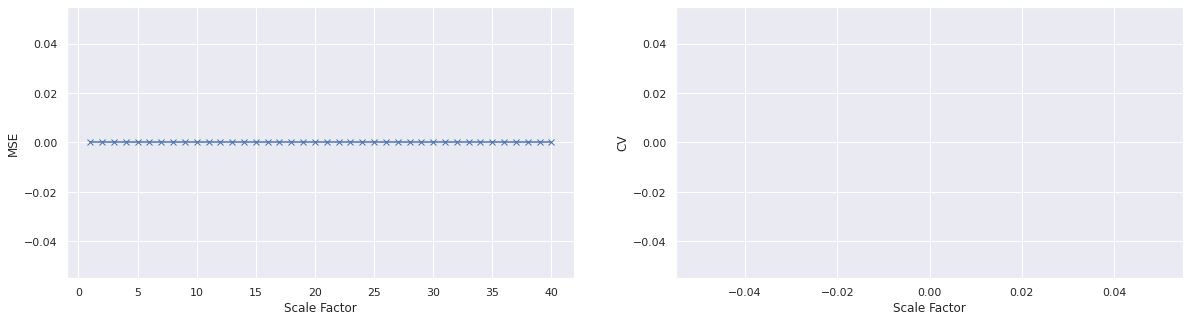

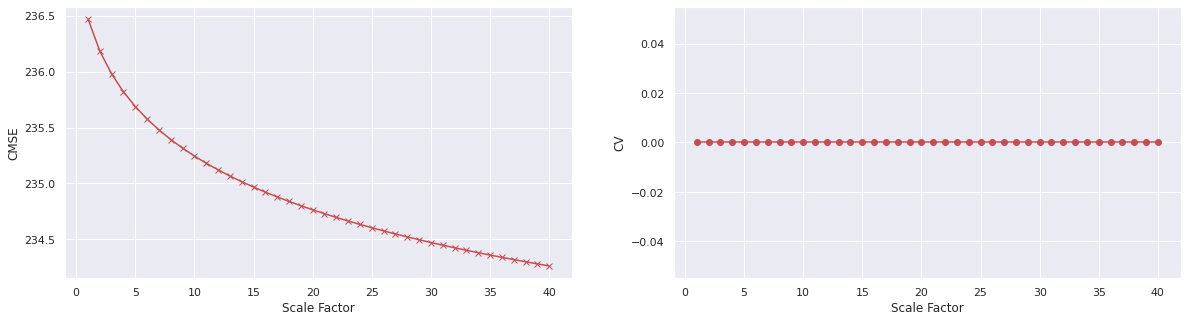

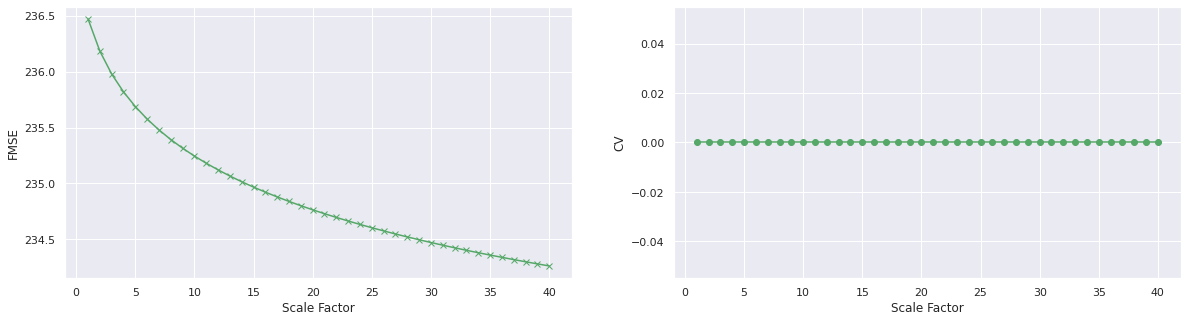

In [26]:
# fig = plt.figure(figsize=(20,5))
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
axes[0].plot((MSE), "b-x")
axes[1].plot((CV_MSE), "b-o")
axes[0].set_xlabel("Scale Factor")
axes[0].set_ylabel("MSE")
axes[1].set_xlabel("Scale Factor")
axes[1].set_ylabel("CV")
# plt.xlim(0)
# plt.ylim(0)
plt.show()

fig1, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
axes[0].plot((CMSE), "r-x")
axes[1].plot((CV_CMSE), "r-o")
axes[0].set_xlabel("Scale Factor")
axes[0].set_ylabel("CMSE")
axes[1].set_xlabel("Scale Factor")
axes[1].set_ylabel("CV")
# plt.xlim(0)
# plt.ylim(0)
plt.show()

fig2, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
axes[0].plot(FMSE, "g-x")
axes[1].plot(CV_FMSE, "g-o")
axes[0].set_xlabel("Scale Factor")
axes[0].set_ylabel("FMSE")
axes[1].set_xlabel("Scale Factor")
axes[1].set_ylabel("CV")
# plt.xlim(0)
# plt.ylim(0)
plt.show()


In [27]:
print(FMSE-CMSE)

[nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


# NEW TESTS

In [28]:
!pip install pyentrp

In [0]:
from pyentrp import entropy as ent

In [0]:
def util_granulate_time_series(time_series, scale):
    """Extract coarse-grained time series
    Args:
        time_series: Time series
        scale: Scale factor
    Returns:
        Vector of coarse-grained time series with given scale factor
    """
    n = len(time_series)
    b = int(np.fix(n / scale))
    temp = np.reshape(time_series[0:b*scale], (b, scale))
    cts = np.mean(temp, axis = 1)
    return cts


In [31]:
testA = Aotizhongxin['PM2.5'].tolist()
# testA = (testA.reshape(-1))
ts = [1, 4, 5, 1, 7, 3, 1, 2, 5, 8, 9, 7, 3, 7, 9, 5, 4, 3]

# print(ts.shape)
print(ent.multiscale_entropy(ts,len(ts),40))

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.6/dist-packages/pyentrp/entropy.py:163: RuntimeWarning: invalid value encountered in true_divide
  sampen =  - np.log(Ntemp[1:] / Ntemp[:-1])
/usr/local/lib/python3.6/dist-packages/pyentrp/entropy.py:163: RuntimeWarning: divide by zero encountered in log
  sampen =  - np.log(Ntemp[1:] / Ntemp[:-1])
